## Load Data

In [1]:
!ls

LICENSE
Mod4_Project_Tino.ipynb
Mod4_Project_Tino_MaryJo.ipynb
README.md
column_names.md
kc_clean_with_employers.csv
kc_housing_data_for_feat_engineering_lab.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', 300)

In [3]:
df_orig = pd.read_csv("kc_housing_data_for_feat_engineering_lab.csv")

In [4]:
df_orig.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,62,2014,3,12.309982
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,66,2014,3,13.195614
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,84,2015,2,12.100712
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,52,2014,3,13.311329
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,30,2015,2,13.142166


## Feature Engineering

In [5]:
df = df_orig.copy()

### Distance to biggest Employers
We assume Hoosing prices are effected by the distance to the biggest employers in the area. The three biggest Employers are:
* Boing
* Microsoft
* Amazon <br>
therefore three Columns are created estimating the distance with log lang data

In [6]:
#Lat and Long Data of the Employers
employers_dict = { "boeing": {"lat":47.6213723 , "long":-122.2890233 },
                  "microsoft":{"lat":47.6423318 , "long":-122.1456849},
                  "amazon":{"lat":47.6222917 , "long":-122.3386826 }}
                     

In [7]:
# Distance estimation using geometric distance
def get_distance(lat,long,t_lat,t_long):
    dx = lat-t_lat
    dy = long-t_long
    return (dx**2+dy**2)**0.5


def get_emp_distance(lat,long,employer):
    t_lat = employers_dict[employer]["lat"]
    t_long = employers_dict[employer]["long"]
    d = get_distance(lat,long,t_lat,t_long)
    return d

In [8]:
# Create Distance Features for Boing, Amazon , Microsoft
#for emp in employers_dict.keys():
#    print(emp)
#    df[emp] = [get_emp_distance(df.iloc[i]["lat"],df.iloc[i]["long"],emp) for i in range(len(df))]

In [9]:
#df.to_csv("kc_clean_with_employers.csv", index = False)

In [10]:
df = pd.read_csv("kc_clean_with_employers.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log,boeing,microsoft,amazon
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,62,2014,3,12.309982,0.114732,0.172008,0.137889
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,66,2014,3,13.195614,0.104040,0.190333,0.100652
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,84,2015,2,12.100712,0.129295,0.129450,0.156634
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,52,2014,3,13.311329,0.144658,0.275563,0.115113
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,30,2015,2,13.142166,0.244066,0.103872,0.293734


## Normalization

In [11]:
#make zipcode categorical
df["zipcode"] = df.zipcode.astype("str")

In [12]:
#make yr_renovated binary since there are 95% data missing
df["yr_renovated"] = df["yr_renovated"].apply(lambda x: 1 if x>0 else 0)
df = df.rename(columns = {"yr_renovated":"renovated"})

In [13]:
df["sqft_basement"] = df["sqft_living"]-df["sqft_above"]
df["sqft_basement"] = df["sqft_basement"].apply(lambda x: 0.1 if x == 0 else x)

In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log,boeing,microsoft,amazon
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.1,1955,0,98178,47.5112,-122.257,1340,5650,62,2014,3,12.309982,0.114732,0.172008,0.137889
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,1951,1,98125,47.7210,-122.319,1690,7639,66,2014,3,13.195614,0.104040,0.190333,0.100652
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.1,1933,0,98028,47.7379,-122.233,2720,8062,84,2015,2,12.100712,0.129295,0.129450,0.156634
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000,52,2014,3,13.311329,0.144658,0.275563,0.115113
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.1,1987,0,98074,47.6168,-122.045,1800,7503,30,2015,2,13.142166,0.244066,0.103872,0.293734


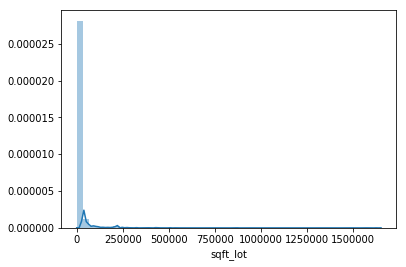

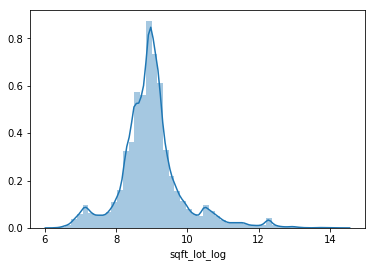

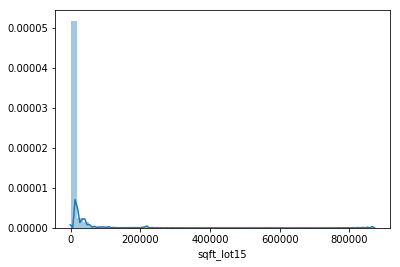

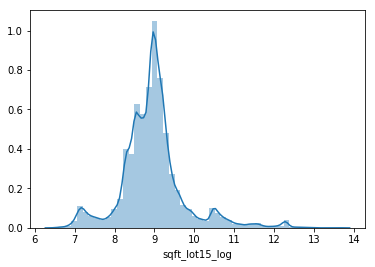

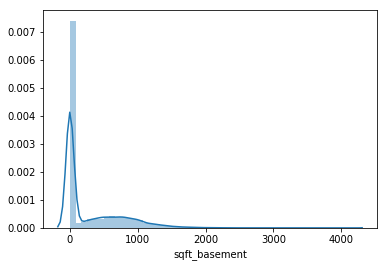

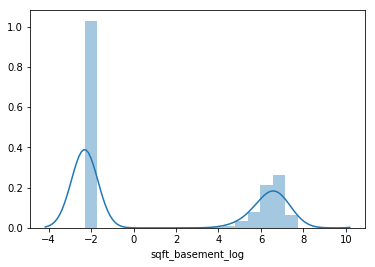

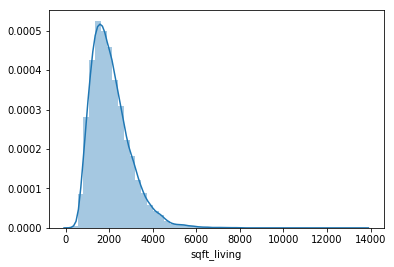

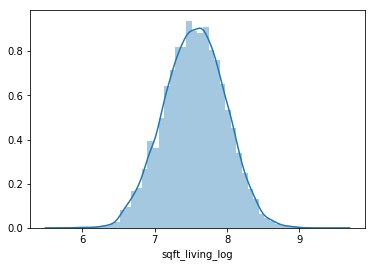

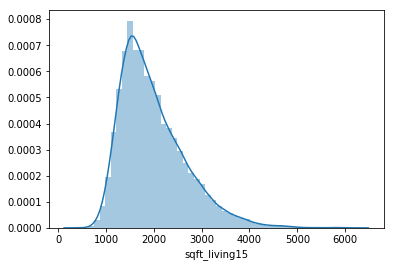

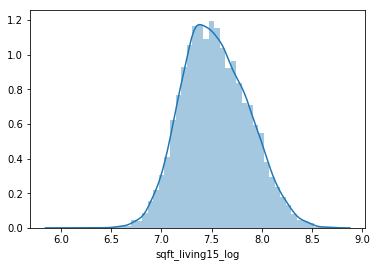

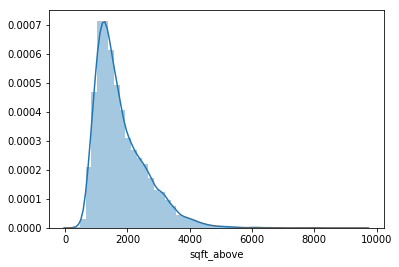

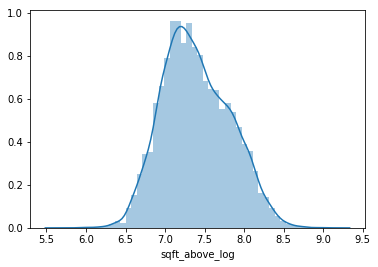

In [15]:
# log transform
import seaborn as sns
logcols = ['sqft_lot','sqft_lot15', 'sqft_basement','sqft_living','sqft_living15', 'sqft_above']
for col in logcols:
    sns.distplot(df[col])
    plt.show()
    df[col+"_log"] = np.log(df[col])
    sns.distplot(df[col+"_log"])
    plt.show()
    df.drop(col, axis = 1 , inplace = True)

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
# Train-Test-Split
X = df.drop(["price", "price_log", "id" ,"date","year_sold"], axis = 1)
y = df.price_log
X_train, X_test ,y_train, y_test = train_test_split(X,y, random_state = 34)

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = X_test.columns)

/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


## Basemodel

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
basemodel = LinearRegression().fit(X_train,y_train)
base_y_hat = basemodel.predict(X_train)
base_r2 =  r2_score(base_y_hat , y_train)
print(f"base_model r^2 Train: {base_r2}")

base_model r^2 Train: 0.7765464953794265


In [32]:
print(f"base_model r^2 Test: {r2_score(basemodel.predict(X_test),y_test)}")

base_model r^2 Test: 0.7597233911527819


In [35]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, basemodel.predict(X_test)))
RMSE/y_train.std()

0.4334889911025388

## Feature Selection

In [42]:
import statsmodels.api as sm

model = sm.OLS(list(y_train),sm.add_constant(X_train)).fit()

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     3291.
Date:                Fri, 14 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:43:32   Log-Likelihood:                 1188.6
No. Observations:               16200   AIC:                            -2331.
Df Residuals:                   16177   BIC:                            -2154.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.0440      0.002   7378.366      0.000      13.041      13.047
bedrooms             -0.0240      0.002     -9.946      0.000      -0.029      -0.019
bathrooms             0.0360      0.003     11.195      0.000       0.030       0.042
floors               -0.0007      0.003     -0.229      0.819      -0.006       0.005
waterfront            0.0444      0.002     22.862      0.000       0.041       0.048
view                  0.0485      0.002     23.172      0.000       0.044       0.053
condition             0.0437      0.002     21.892      0.000       0.040       0.048
grade                 0.1582      0.003     49.453      0.000       0.152       0.164
yr_built             -0.0219      0.001    -14.670      0.000      -0.025      -0.019
renovated             0.0189      0.002      9.917      0.000       0.015       0.023
zipcode              -0.0771      0.003    -29.886      0.000      -0.082      -0.072
lat                   0.0874      0.003     27.642      0.000       0.081       0.094
long                  0.3193      0.007     48.976      0.000       0.306       0.332
yr_old                0.0219      0.001     14.670      0.000       0.019       0.025
since_sold           -0.0227      0.002    -12.826      0.000      -0.026      -0.019
boeing                0.3917      0.021     18.303      0.000       0.350       0.434
microsoft             0.0520      0.006      8.725      0.000       0.040       0.064
amazon               -0.8443      0.024    -35.765      0.000      -0.891      -0.798
sqft_lot_log          0.0420      0.005      9.002      0.000       0.033       0.051
sqft_lot15_log       -0.0084      0.005     -1.826      0.068      -0.017       0.001
sqft_basement_log     0.0299      0.004      6.913      0.000       0.021       0.038
sqft_living_log       0.0672      0.009      7.649      0.000       0.050       0.084
sqft_living15_log     0.0743      0.003     24.604      0.000       0.068       0.080
sqft_above_log        0.1033      0.009     11.916      0.000       0.086       0.120
==============================================================================
Omnibus:                      443.858   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1127.585
Skew:                           0.003   Prob(JB):                    1.41e-245
Kurtosis:                       4.292   Cond. No.                     1.30e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.91e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
cols = ['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'renovated',
 'sqft_living15',
 'sqft_lot15',
 'yr_old',
 'since_sold',
 'boeing',
 'microsoft',
 'amazon']

In [ ]:
import seaborn as sns

In [ ]:
#sns.pairplot(pd.concat([X_train,y_train], axis = 1), vars = cols , y_vars = y_train.name)

In [ ]:
X_train[cols].corr().applymap(lambda x: x if abs(x)>.9 else "")

### Creating a Price per sqft by zipcode Feature

In [ ]:
# Calculated field created for price/sqft
y_train
df = X_train
df['price_sqft'] = y_train/ df['sqft_living']

In [ ]:
grouped = df.groupby('zipcode')
grouped_psqft = grouped['price_sqft'].agg(np.mean)

#aggregate
df = df.merge(grouped_psqft, left_on=['zipcode'], right_on=['zipcode'])
df.rename(columns={'price_sqft_y':'price_sqft_mean_zip'}, inplace=True)

In [ ]:
X_train.head()

In [ ]:
X_train.head()
